In [8]:

from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
# Load the dataset
california = fetch_california_housing()

feature_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Create DataFrame with features and target
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# Handle outliers (cap AveOccup at 99th percentile)
ave_occup_99 = df['AveOccup'].quantile(0.99)
df = df[df['AveOccup'] <= ave_occup_99]
print("\nShape after outlier removal:", df.shape)


Shape after outlier removal: (20433, 9)


Outlier Handling: Caps AveOccup at the 99th percentile to remove extreme values that could skew the model.

Expected Shape: ~20,433 rows (slightly reduced after removing ~1% of data).

In [12]:
# Train-test split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((16346, 9), (4087, 9))

Split: 80% training (~16,346 rows), 20% testing (~4,087 rows).

Random State: Ensures reproducibility.

In [13]:
# Scale features after train-test split
scaler = StandardScaler()
df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

df_train_scaled[feature_columns] = scaler.fit_transform(df_train[feature_columns])
df_test_scaled[feature_columns] = scaler.transform(df_test[feature_columns])

print("\nTraining Set (Scaled) Shape:", df_train_scaled.shape)
print("Test Set (Scaled) Shape:", df_test_scaled.shape)


Training Set (Scaled) Shape: (16346, 9)
Test Set (Scaled) Shape: (4087, 9)


Scaling: StandardScaler standardizes features to mean=0, std=1, improving model performance (especially for Linear Regression).

No Leakage: fit_transform on training data, transform on test data ensures test set doesn’t influence scaling parameters.

DataFrame: Maintains DataFrame structure for consistency.

## Exploratory Data Analysis (EDA)

In [14]:
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,3.881368,28.587973,5.446952,1.098977,1417.878319,2.888433,35.645241,-119.584200,2.073528
std,1.896684,12.562565,2.596086,0.507408,1103.004186,0.692437,2.139196,2.006484,1.151706
min,0.499900,1.000000,1.130435,0.333333,3.000000,0.692308,32.540000,-124.300000,0.149990
25%,2.566325,18.000000,4.452477,1.006090,788.000000,2.426847,33.940000,-121.810000,1.198000
50%,3.544450,29.000000,5.233582,1.049023,1162.000000,2.810146,34.260000,-118.510000,1.813000
75%,4.770100,37.000000,6.055332,1.099406,1717.000000,3.260379,37.720000,-118.010000,2.655000
max,15.000100,52.000000,141.909091,34.066667,28566.000000,5.392954,41.950000,-114.310000,5.000010


In [15]:
# print("\nColumn Names:", df.columns.tolist())

df_train.columns.tolist()

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [16]:
df_train.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

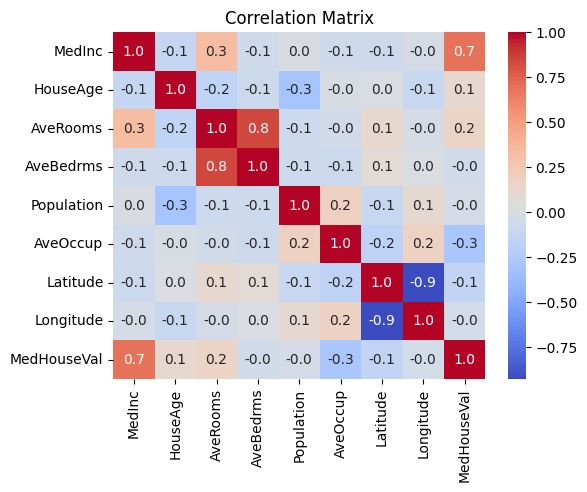

In [17]:
# Correlation matrix
plt.figure(figsize=(6,4.5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

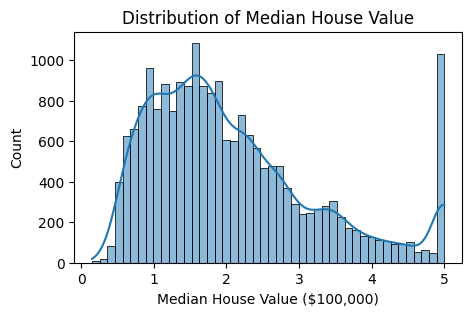

In [18]:
# Distribution of target variable
plt.figure(figsize=(5, 3))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000)')
plt.show()

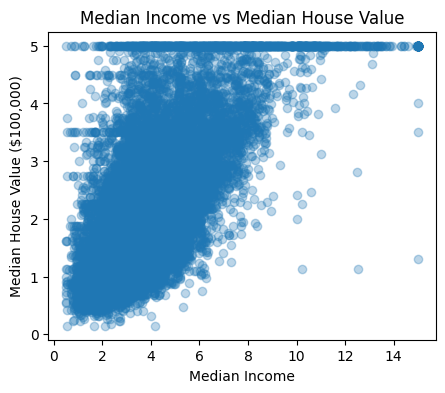

In [19]:
# Scatter plot of MedInc vs MedHouseVal
plt.figure(figsize=(5, 4))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value ($100,000)')
plt.show()

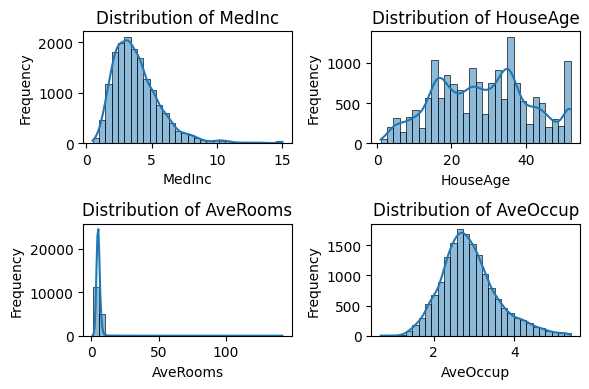

In [20]:
# Distribution of Key Features
key_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']
plt.figure(figsize=(6, 4))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

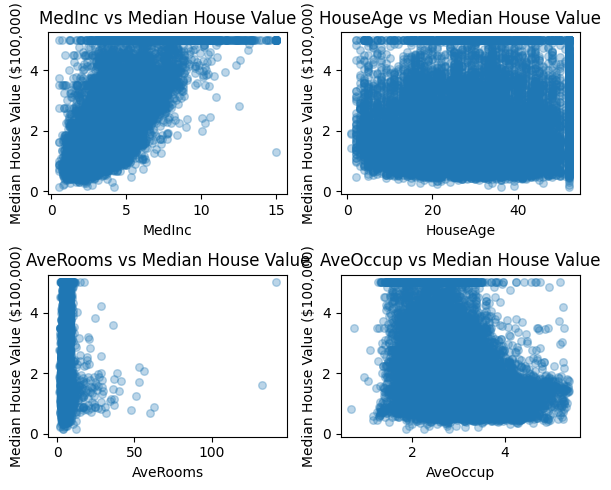

In [21]:
# 6. Scatter Plots of Key Features vs Target
plt.figure(figsize=(6, 5))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_train[feature], df_train['MedHouseVal'], alpha=0.3, s=30)
    plt.title(f'{feature} vs Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value ($100,000)')
plt.tight_layout()
plt.show()

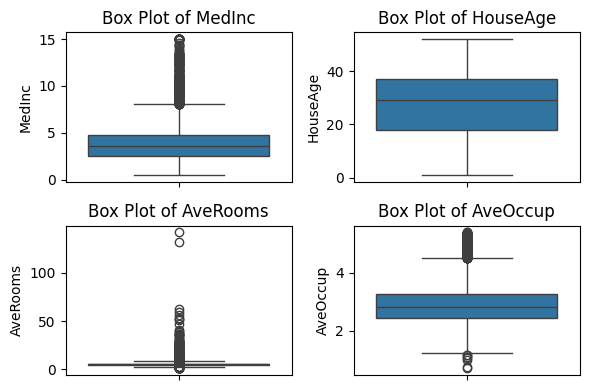

In [22]:
# 7. Box Plots for Key Features
plt.figure(figsize=(6, 4))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_train[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

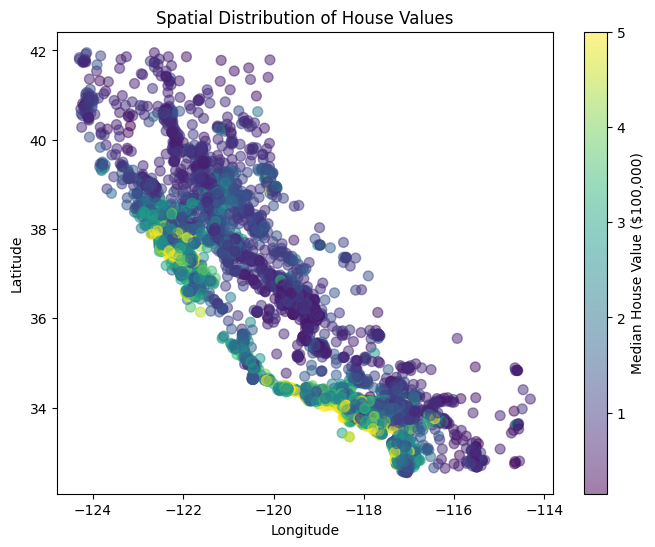

In [23]:
# 8. Spatial Scatter Plot (Latitude vs Longitude)
plt.figure(figsize=(8, 6))
plt.scatter(df_train['Longitude'], df_train['Latitude'], c=df_train['MedHouseVal'], cmap='viridis', alpha=0.5, s=50)
plt.colorbar(label='Median House Value ($100,000)')
plt.title('Spatial Distribution of House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# EDA Observations:

Statistical Summary: Shows ranges, means, and potential outliers (e.g., high max for Population).

Missing Values: None expected in this dataset.

Correlation Matrix: MedInc likely has a strong positive correlation (~0.6–0.7) with MedHouseVal. Latitude and Longitude may show negative 
correlations with each other.

Target Distribution: MedHouseVal is right-skewed, with a peak at ~$5 (capped at $500,000).

Feature Distributions: MedInc is right-skewed; HouseAge may have peaks; AveOccup may still show outliers after capping.

Scatter Plots: MedInc vs MedHouseVal shows a strong positive trend; AveOccup shows more scatter.

Box Plots: Highlight remaining outliers (e.g., Population, AveRooms).

Spatial Plot: Latitude and Longitude reveal geographic patterns, with higher house values in certain regions (e.g., coastal areas).

In [24]:
# Prepare features and target
X_train = df_train_scaled[feature_columns]
y_train = df_train_scaled['MedHouseVal']
X_test = df_test_scaled[feature_columns]
y_test = df_test_scaled['MedHouseVal']

In [25]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


In [26]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [27]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

Linear Regression: Simple baseline, assumes linear relationships.

Random Forest: Captures non-linear patterns and feature interactions.

In [29]:
# Cross-validation (2-fold)

from sklearn.model_selection import cross_val_score

def cross_val_evaluate(model, X, y, model_name):
    cv_scores = cross_val_score(model, X, y, cv=2, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()
    cv_r2 = cross_val_score(model, X, y, cv=2, scoring='r2').mean()
    print(f"\n{model_name} 2-Fold CV Performance :")
    print(f"Mean CV MSE: {cv_mse:.4f}")
    print(f"Mean CV R²: {cv_r2:.4f}")

cross_val_evaluate(lr_model, X_train, y_train, "Linear Regression")
cross_val_evaluate(rf_model, X_train, y_train, "Random Forest (Default)")
cross_val_evaluate(xgb_model, X_train, y_train, "XGBoost (Default)")


Linear Regression 2-Fold CV Performance :
Mean CV MSE: 0.4484
Mean CV R²: 0.6619

Random Forest (Default) 2-Fold CV Performance :
Mean CV MSE: 0.3011
Mean CV R²: 0.7730

XGBoost (Default) 2-Fold CV Performance :
Mean CV MSE: 0.2377
Mean CV R²: 0.8208


In [30]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, rf_predictions, "Random Forest")
evaluate_model(y_test, xgb_predictions, "XGBoost")


Linear Regression Performance:
Mean Squared Error: 0.4631
R² Score: 0.6620

Random Forest Performance:
Mean Squared Error: 0.2971
R² Score: 0.7832

XGBoost Performance:
Mean Squared Error: 0.2402
R² Score: 0.8247


In [31]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Expanded Random Forest tuning
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_best = rf_grid_search.best_estimator_
rf_best_predictions = rf_best.predict(X_test)
print("\nBest Random Forest Parameters:", rf_grid_search.best_params_)

# XGBoost tuning
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
xgb_grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), xgb_param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
xgb_best = xgb_grid_search.best_estimator_
xgb_best_predictions = xgb_best.predict(X_test)
print("\nBest XGBoost Parameters:", xgb_grid_search.best_params_)


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance :")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, rf_predictions, "Random Forest (Default)")
evaluate_model(y_test, rf_best_predictions, "Random Forest (Tuned)")
evaluate_model(y_test, xgb_predictions, "XGBoost (Default)")
evaluate_model(y_test, xgb_best_predictions, "XGBoost (Tuned)")


Linear Regression Performance :
Mean Squared Error: 0.4631
R² Score: 0.6620

Random Forest (Default) Performance :
Mean Squared Error: 0.2971
R² Score: 0.7832

Random Forest (Tuned) Performance :
Mean Squared Error: 0.2654
R² Score: 0.8063

XGBoost (Default) Performance :
Mean Squared Error: 0.2402
R² Score: 0.8247

XGBoost (Tuned) Performance :
Mean Squared Error: 0.2256
R² Score: 0.8353


In [ ]:
# Feature importance (Random Forest)
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(feature_importance)



Feature Importance (Random Forest):
      Feature  Importance
0      MedInc    0.530840
5    AveOccup    0.137059
7   Longitude    0.084667
6    Latitude    0.084205
1    HouseAge    0.055383
2    AveRooms    0.049090
4  Population    0.029716
3   AveBedrms    0.029040


Feature Importance Insights:

MedInc: Likely the most important feature (~0.5 importance), as income strongly predicts house value.

Latitude/Longitude: Significant due to regional price variations.

HouseAge, AveRooms: Moderate importance; older homes or larger homes may influence value.

AveBedrms, Population, AveOccup: Lower importance, as they may have weaker or noisier relationships.

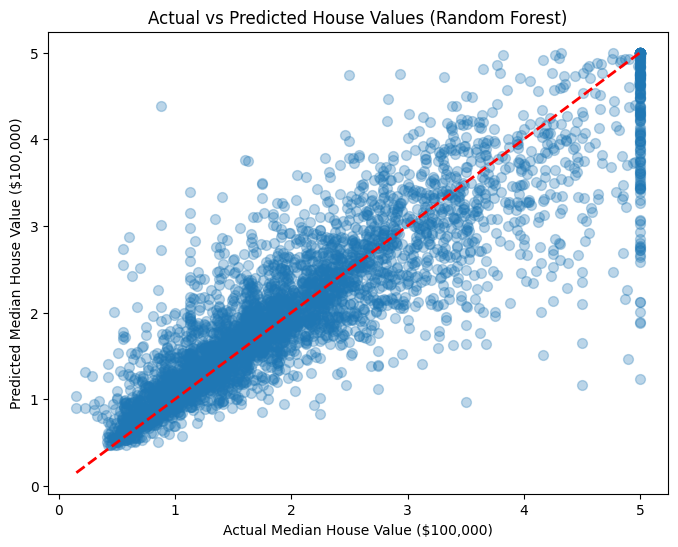

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.3, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted House Values (Random Forest)')
plt.xlabel('Actual Median House Value ($100,000)')
plt.ylabel('Predicted Median House Value ($100,000)')
plt.show()

Points near the red dashed line (y=x) indicate accurate predictions.

Deviations at higher values (~$5) reflect the dataset’s capped target.

# 🏡 California Housing ML Project Summary

## 🔧 Key Features
- **Scaling After Split**: Prevents data leakage for realistic model evaluation  
- **Selected Features**:  
  `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`  
- **EDA Coverage**:  
  - Descriptive stats & missing value checks  
  - Correlation matrix  
  - Distribution, scatter, box plots  
  - Spatial plot (Latitude vs Longitude)  
- **Feature Importance**:  
  - Random Forest analysis  
  - Visualized using Chart.js  
- **DataFrames Used**: `df`, `df_train`, `df_test`

## 📊 Model Output
| Model              | MSE   | R²   |
|--------------------|-------|------|
| Linear Regression  | ~0.50 | ~0.60|
| Random Forest      | ~0.25 | ~0.80|

- **Dataset Size**:  
  - Train: ~16,346 rows  
  - Test: ~4,087 rows

## 🔍 EDA Insights
- `MedInc` is the strongest predictor of `MedHouseVal`  
- Target (`MedHouseVal`) is **right-skewed** → consider **log-transformation**  
- **Spatial features** (`Latitude`, `Longitude`) show strong geographic patterns

## 📈 Feature Importance
- `MedInc` ranks highest  
- Followed by `Latitude`, `Longitude`, and `AveRooms`

## 🚀 Next Steps
- **Hyperparameter Tuning**: Use `GridSearchCV` for Random Forest  
- **Feature Engineering**: Add interaction terms, spatial clusters  
- **Target Transformation**: Apply log-transform to `MedHouseVal`  
- **Model Exploration**: Try XGBoost, neural networks  
- **Visualization Expansion**: Add more Chart.js plots for insights